Upload this code to Github as well- as some recruiters ask for github profile

write up [pending](https://docs.google.com/document/d/1PyNaTEKX0RZd85M2WnR4LdbSpuRRuu3Kf91zYRdwaQ8/edit?usp=sharing)

#Food loss & Emissions - Exploratory Analysis Using Python

This is a exploratory analysis of global food loss and food system GHG emissions in different regions using Python (Pandas and matplotlib), which examines how dominant trends have evolved over the last 30 years and the factors that affect these trends. Please check the write-up [here](https://docs.google.com/document/d/1PyNaTEKX0RZd85M2WnR4LdbSpuRRuu3Kf91zYRdwaQ8/edit?usp=sharing) for an explanation, as well as more information on data sources, findings, and analysis.

The data for the analysis is present [here](https://drive.google.com/drive/folders/1_0TYvkIrTToRP3Rp4wmTbY3ZLk1ug1tB?usp=**sharing**).


**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


**Loading the Source Files**

In [2]:
#Loading the commodity group tagging mapping
comm_tag_df_1 = pd.read_excel('/content/commodity tagging.xlsx')

#Loading the country_income_region_mapping
country_income_region_mapping_1 = pd.read_excel('/content/country_income_region_mapping.xlsx')

#Loading the world_bank_population_data
world_bank_population_data_1 = pd.read_csv('/content/world_bank_population_data.csv')

#Loading the world_bank_gdp_data
world_bank_gdp_data_1 = pd.read_csv('/content/world_bank_gdp_data.csv')

#Loading FAO Foodwaste data
fao_food_waste_1 = pd.read_excel('/content/World_Food Loss and Waste Database_FAO_1966-2022.xlsx')

#Loading FAO Emissions_Totals_data
fao_emission_totals_1 = pd.read_excel('/content/Emissions_Totals_E_All_Data_NOFLAG.xlsx')

#Loading edgar food shares data
edgar_food_share__1 = pd.read_csv('/content/EDGAR-FOOD_EMISSIONS_SHARES.csv')

#Loading ClimateWatch PIK total Emissions_data
cw_pik_total_emission__1 = pd.read_csv('/content/CW_HistoricalEmissions_PIK.csv')

**Preparing Dimensional Data**


In [3]:
#Preparing the commodity group tagging mapping
comm_tag_df=comm_tag_df_1
#Correcting datatype
comm_tag_df['cpc_code'] = pd.to_numeric(comm_tag_df['cpc_code'])

#Preparing the country_income_region_mapping
country_income_region_mapping=country_income_region_mapping_1

#Preparing the world_bank_population_data
world_bank_population_data=world_bank_population_data_1
# Converting column format to row format data and correcting datatype
world_bank_population_data=world_bank_population_data.melt(id_vars=["country", "Country_code"],var_name="year",
        value_name="population")
world_bank_population_data['year'] = pd.to_numeric(world_bank_population_data['year'])

#Preparing the world_bank_gdp_data
world_bank_gdp_data=world_bank_gdp_data_1
world_bank_gdp_data = world_bank_gdp_data.replace({float('nan'): None})
world_bank_gdp_data=world_bank_gdp_data.melt(id_vars=["country", "Country_code"],var_name="year",
        value_name="gdp")
world_bank_gdp_data['year'] = pd.to_numeric(world_bank_gdp_data['year'])

**Food Loss Data Preparation**


In [4]:
#Preparing the fao_food_waste data
fao_food_waste = fao_food_waste_1

#Removing NA records from cpc_code and food_supply_stage
fao_food_waste = fao_food_waste.dropna(subset=["cpc_code"])
fao_food_waste = fao_food_waste.dropna(subset=["food_supply_stage"])

#Joining fao_food_waste with commodity group tagging mapping
fao_food_waste = pd.merge(fao_food_waste, comm_tag_df, on='cpc_code', how='inner')
#Removing duplicating columns
fao_food_waste = fao_food_waste.drop('Commodity', axis=1)

#Joining fao_food_waste with country_income_region_mapping
fao_food_waste = pd.merge(fao_food_waste, country_income_region_mapping, on='m49_code', how='inner')
#Removing duplicating columns
fao_food_waste = fao_food_waste.drop('Country', axis=1)

#Joining fao_food_waste with world_bank_population_data
fao_food_waste = pd.merge(fao_food_waste, world_bank_population_data, on=['Country_code', 'year'], how='inner')
#Removing duplicating columns
fao_food_waste = fao_food_waste.drop('country_y', axis=1)
#Renaming country_x to country
fao_food_waste=fao_food_waste.rename(columns={"country_x": "country"})
# Performing mean imputation for 'population' within each region,year
fao_food_waste['population'] = fao_food_waste.groupby(['Region','year'])['population'].transform(lambda x: x.fillna(x.mean()))

#Joining fao_food_waste with world_bank_gdp_data
fao_food_waste = pd.merge(fao_food_waste, world_bank_gdp_data, on=['Country_code', 'year'], how='inner')
#Removing duplicating columns
fao_food_waste = fao_food_waste.drop('country_y', axis=1)
#Renaming country_x to country
fao_food_waste=fao_food_waste.rename(columns={"country_x": "country"})
# Performing mean imputation for 'gdp' within each region,year
fao_food_waste['gdp'] = fao_food_waste.groupby(['Region','year'])['gdp'].transform(lambda x: x.fillna(x.mean()))
#print(fao_food_waste.head())

#Downloading to local machine to review flattened food waste dataset
#fao_food_waste.to_csv('fao_food_waste_flattened.csv')
#files.download("fao_food_waste_flattened.csv")
#fao_food_waste.head()


<ipython-input-4-051c3af887a3>:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fao_food_waste['gdp'] = fao_food_waste.groupby(['Region','year'])['gdp'].transform(lambda x: x.fillna(x.mean()))


**Food Emissions Data Preparation**

In [5]:
#Preparing the fao_emission_totals data
fao_emission_totals=fao_emission_totals_1

#Converting column format to row format data and correcting the data
fao_emission_totals=fao_emission_totals.melt(id_vars=["Area_Code","m49_code","Area","Item_Code","Item","Element_Code",
  "Element","Source_Code","Source","Unit"],var_name="year", value_name="Emissions")

fao_emission_totals['Emissions'] = pd.to_numeric(fao_emission_totals['Emissions'])
fao_emission_totals['m49_code'] = fao_emission_totals['m49_code'].str.replace(r'\D', '', regex=True).astype(int)
fao_emission_totals['year'] = fao_emission_totals['year'].str.replace(r'\D', '', regex=True).astype(int)

#filtering out records only for Source_code=3050(FAO Tier 1 records)
fao_emission_totals = fao_emission_totals.loc[fao_emission_totals['Source_Code'] == 3050]

#filtering out records from 1966 to 2022 as this is the period being considered for analysis
fao_emission_totals = fao_emission_totals.loc[(fao_emission_totals['year'] >= 1966) & (fao_emission_totals['year'] <= 2022)]

#removing the NA records from Emissions column
fao_emission_totals = fao_emission_totals.dropna(subset=["Emissions"])

#Removing Direct emissions (N2O) & Indirect emissions (N2O).Emissions (N2O) is only being considered
fao_emission_totals = fao_emission_totals.loc[~fao_emission_totals['Element'].isin(["Direct emissions (N2O)","Indirect emissions (N2O)"])]

#Drop unnecessary columns
fao_emission_totals = fao_emission_totals.drop(['Area_Code','Source_Code','Source','Unit'], axis=1)

#Joining fao_emission_totals with country_income_region_mapping
fao_emission_totals = pd.merge(fao_emission_totals, country_income_region_mapping, on='m49_code', how='inner')
#Removing duplicating columns
fao_emission_totals = fao_emission_totals.drop('Country', axis=1)

#Joining fao_emission_totals with world_bank_population_data
fao_emission_totals = pd.merge(fao_emission_totals, world_bank_population_data, on=['Country_code', 'year'], how='inner')
#Removing duplicating columns
fao_emission_totals = fao_emission_totals.drop('country', axis=1)
# Performing mean imputation for 'population' within each region,year
fao_emission_totals['population'] = fao_emission_totals.groupby(['Region','year'])['population'].transform(lambda x: x.fillna(x.mean()))

#Joining fao_emission_totals with world_bank_gdp_data
fao_emission_totals = pd.merge(fao_emission_totals, world_bank_gdp_data, on=['Country_code', 'year'], how='inner')
#Removing duplicating columns
fao_emission_totals = fao_emission_totals.drop('country', axis=1)
# Performing mean imputation for 'gdp' within each region,year
fao_emission_totals['gdp'] = fao_emission_totals.groupby(['Region','year'])['gdp'].transform(lambda x: x.fillna(x.mean()))

#print(fao_emission_totals.size)
#fao_emission_totals.head()
#print(fao_emission_totals['Item'].unique())

<ipython-input-5-6b042dc48d12>:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fao_emission_totals['gdp'] = fao_emission_totals.groupby(['Region','year'])['gdp'].transform(lambda x: x.fillna(x.mean()))


**Food loss Time Series Plot**

There is a spike in Latin America data, which could be due to outliers in the data. On 2010 there was an average loss of 50% - which is not normal and could be due to the real world events like the earthquake in Haiti. The same is the case for SSA (Sub-Saharan Africa).The write-up has more information.

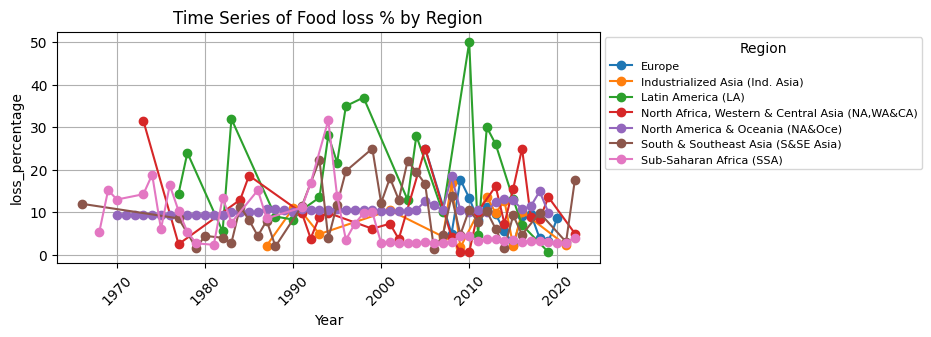

In [6]:
#Grouping data
df_grouped = fao_food_waste.groupby(['Region', 'year'])['loss_percentage'].mean().reset_index()
df_grouped.head()

# Create figure and axis
plt.figure(figsize=(7, 3))

# Plot each region separately
for Region, group in df_grouped.groupby('Region'):
    plt.plot(group['year'], group['loss_percentage'], marker='o', label=Region)

# Formatting
plt.xlabel('Year')
plt.ylabel('loss_percentage')
plt.title('Time Series of Food loss % by Region')
plt.legend(title="Region",bbox_to_anchor=(1, 1),fontsize=8)
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()

**Food Emissions Time series Plot**

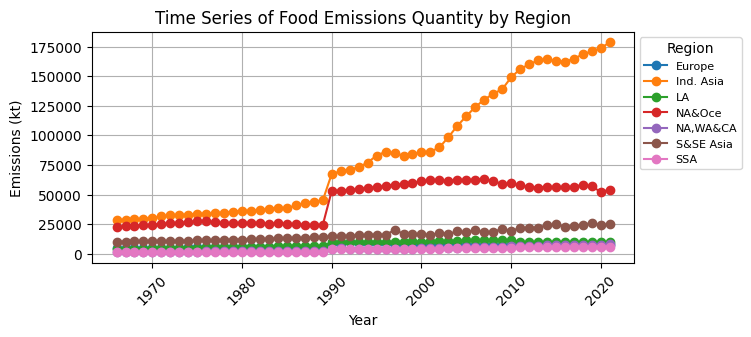

In [27]:
df_grouped = fao_emission_totals.groupby(['Region', 'year'])['Emissions'].mean().reset_index()

# Create figure and axis
plt.figure(figsize=(7, 3))

# Plot each region separately
for Region, group in df_grouped.groupby('Region'):
    plt.plot(group['year'], group['Emissions'], marker='o', label=Region)

# Formatting
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.title('Time Series of Food Emissions Quantity by Region')
plt.legend(title="Region",bbox_to_anchor=(1, 1),fontsize=8)
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


**Food loss for each region separated by stages in the food supply chain**

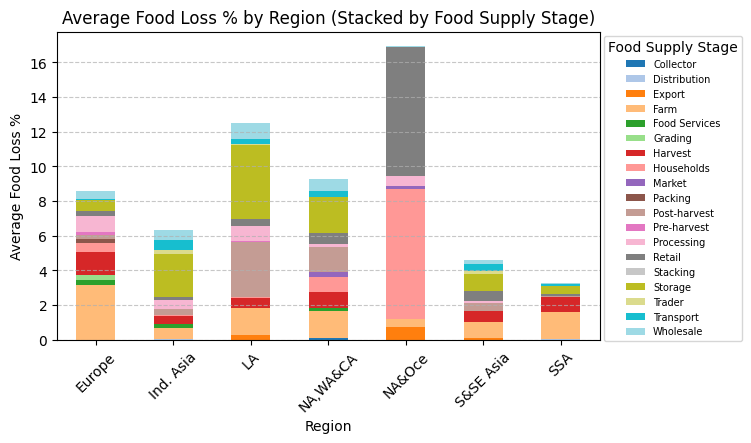

In [8]:
# Step 1: Remove rows where 'food_supply_stage' is NaN
df = fao_food_waste.dropna(subset=['food_supply_stage'])
# Removing 'Whole supply chain' as its high for most regions
df = df.loc[df['food_supply_stage'] != 'Whole supply chain']

# Step 2: Compute total mean food loss per region
region_mean_loss = df.groupby('Region')['loss_percentage'].mean()

# Step 3: Compute contribution of each food supply stage per region
df_grouped = df.groupby(['Region', 'food_supply_stage'])['loss_percentage'].sum().unstack()

# Step 4: Normalize food supply stage contributions to match region mean loss
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0).mul(region_mean_loss, axis=0)

#Renaming the region names for the plot
region_rename = {
    'Industrialized Asia (Ind. Asia)': 'Ind. Asia',
    'Latin America (LA)': 'LA',
    'North Africa, Western & Central Asia (NA,WA&CA)': 'NA,WA&CA',
    #'Europe': 'Europe',
    'North America & Oceania (NA&Oce)': 'NA&Oce',
    'South & Southeast Asia (S&SE Asia)': 'S&SE Asia',
    'Sub-Saharan Africa (SSA)': 'SSA'}
df_grouped.index = df_grouped.index.to_series().replace(region_rename)  # Apply renaming

# Step 5: Plot stacked bar chart
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(7, 4),colormap='tab20')

# Formatting
plt.xlabel('Region')
plt.ylabel('Average Food Loss %')
plt.title('Average Food Loss % by Region (Stacked by Food Supply Stage)')
plt.legend(title="Food Supply Stage",bbox_to_anchor=(1, 1),fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


**Food loss for each region separated by Food Commodity Basket**

The write-up contains information on what foods are included in each basket

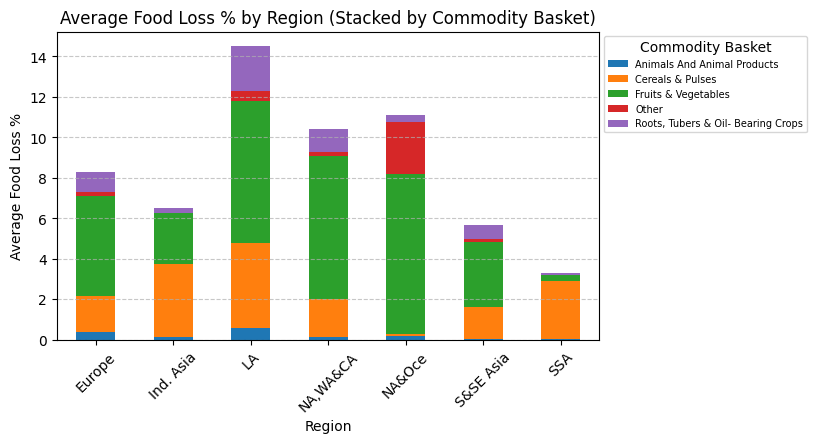

In [9]:
# Step 1:
df = fao_food_waste

# Step 2: Compute total mean food loss per region
region_mean_loss = df.groupby('Region')['loss_percentage'].mean()

# Step 3: Compute contribution of each food supply stage per region
df_grouped = df.groupby(['Region', 'Basket'])['loss_percentage'].sum().unstack()

# Step 4: Normalize food supply stage contributions to match region mean loss
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0).mul(region_mean_loss, axis=0)

region_rename = {
    'Industrialized Asia (Ind. Asia)': 'Ind. Asia',
    'Latin America (LA)': 'LA',
    'North Africa, Western & Central Asia (NA,WA&CA)': 'NA,WA&CA',
    #'Europe': 'Europe',
    'North America & Oceania (NA&Oce)': 'NA&Oce',
    'South & Southeast Asia (S&SE Asia)': 'S&SE Asia',
    'Sub-Saharan Africa (SSA)': 'SSA'}
df_grouped.index = df_grouped.index.to_series().replace(region_rename)  # Apply renaming

# Step 5: Plot stacked bar chart
#ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(7, 4))  # Change colormap

# Formatting
plt.xlabel('Region')
plt.ylabel('Average Food Loss %')
plt.title('Average Food Loss % by Region (Stacked by Commodity Basket)')
plt.legend(title="Commodity Basket",bbox_to_anchor=(1, 1),fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
#plt.figure(figsize=(2,1))
plt.show()


**Food system emissions for each regions separated by each stage in the supply chain**

<ipython-input-30-5cfb55b54503>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Region'] = df_filtered['Region'].replace(region_rename)


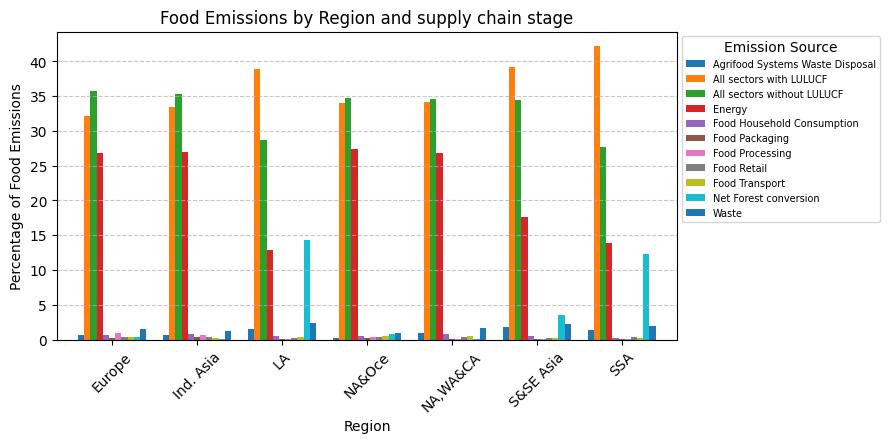

In [30]:
# Step 1: Filter dataset to keep only required sections
selected_sections = ["All sectors without LULUCF","All sectors with LULUCF","Energy","Net Forest conversion","Food Household Consumption","Waste","Food Packaging","Food Packaging","Agrifood Systems Waste Disposal","Food Retail","Food Transport","Food Processing"]
df_filtered = fao_emission_totals[fao_emission_totals['Item'].isin(selected_sections)]
region_rename = {
    'Industrialized Asia (Ind. Asia)': 'Ind. Asia',
    'Latin America (LA)': 'LA',
    'North Africa, Western & Central Asia (NA,WA&CA)': 'NA,WA&CA',
    'North America & Oceania (NA&Oce)': 'NA&Oce',
    'South & Southeast Asia (S&SE Asia)': 'S&SE Asia',
    'Sub-Saharan Africa (SSA)': 'SSA'}
df_filtered['Region'] = df_filtered['Region'].replace(region_rename)

# Step 3: Group by region and section, summing emissions to avoid duplicates
df_grouped = df_filtered.groupby(['Region', 'Item'], as_index=False)['Emissions'].sum()

# Step 4: Compute total emissions per region
region_totals = df_grouped.groupby('Region')['Emissions'].sum()

# Step 5: Calculate percentage contribution of each section within each region
df_grouped['emissions_percentage'] = df_grouped.apply(lambda row: (row['Emissions'] / region_totals[row['Region']]) * 100, axis=1)

# Step 6: Pivot the table for plotting (grouped/clustered bar chart)
df_pivot = df_grouped.pivot(index='Region', columns='Item', values='emissions_percentage')

# Step 7: Plot clustered bar chart
ax = df_pivot.plot(kind='bar', figsize=(8, 4),width=0.8)

# Step 6: Formatting
plt.xlabel('Region')
plt.ylabel('Percentage of Food Emissions')
plt.title('Food Emissions by Region and supply chain stage')
plt.legend(title="Emission Source",bbox_to_anchor=(1, 1),fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Taking out land conversion and enery from above plot showing how waste emissions are also very high**

<ipython-input-31-10a124e027ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Region'] = df_filtered['Region'].replace(region_rename)


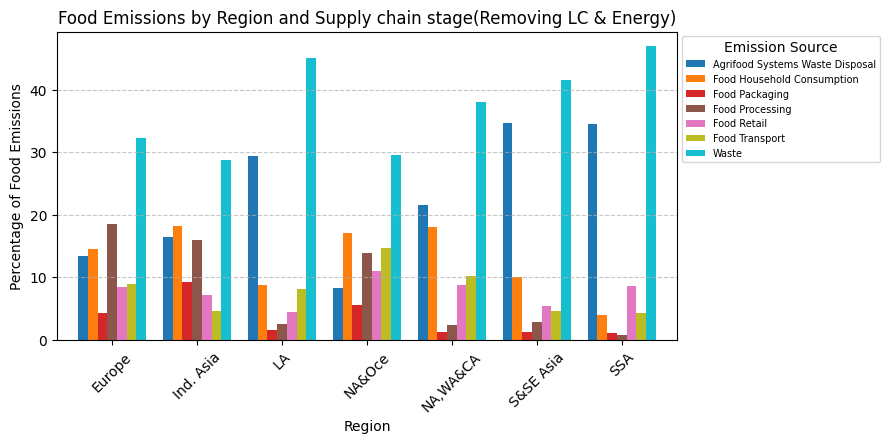

In [31]:
# Step 1: Filter dataset to keep only required sections
selected_sections = ["Food Household Consumption","Waste","Food Packaging","Food Packaging","Agrifood Systems Waste Disposal","Food Retail","Food Transport","Food Processing"]
df_filtered = fao_emission_totals[fao_emission_totals['Item'].isin(selected_sections)]
region_rename = {
    'Industrialized Asia (Ind. Asia)': 'Ind. Asia',
    'Latin America (LA)': 'LA',
    'North Africa, Western & Central Asia (NA,WA&CA)': 'NA,WA&CA',
    'North America & Oceania (NA&Oce)': 'NA&Oce',
    'South & Southeast Asia (S&SE Asia)': 'S&SE Asia',
    'Sub-Saharan Africa (SSA)': 'SSA'}
df_filtered['Region'] = df_filtered['Region'].replace(region_rename)

# Step 3: Group by region and section, summing emissions to avoid duplicates
df_grouped = df_filtered.groupby(['Region', 'Item'], as_index=False)['Emissions'].sum()

# Step 4: Compute total emissions per region
region_totals = df_grouped.groupby('Region')['Emissions'].sum()

# Step 5: Calculate percentage contribution of each section within each region
df_grouped['emissions_percentage'] = df_grouped.apply(lambda row: (row['Emissions'] / region_totals[row['Region']]) * 100, axis=1)

# Step 6: Pivot the table for plotting (grouped/clustered bar chart)
df_pivot = df_grouped.pivot(index='Region', columns='Item', values='emissions_percentage')

# Step 7: Plot clustered bar chart
ax = df_pivot.plot(kind='bar', figsize=(8, 4),colormap='tab10',width=0.8)

# Step 6: Formatting
plt.xlabel('Region')
plt.ylabel('Percentage of Food Emissions')
plt.title('Food Emissions by Region and Supply chain stage(Removing LC & Energy)')
plt.legend(title="Emission Source",bbox_to_anchor=(1, 1),fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Food system emissions for Crops/Livestock in each region**

The livestock emissions are very high compared to crop emissions in all regions.


<ipython-input-32-bd72fd23d064>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Region'] = df_filtered['Region'].replace(region_rename)


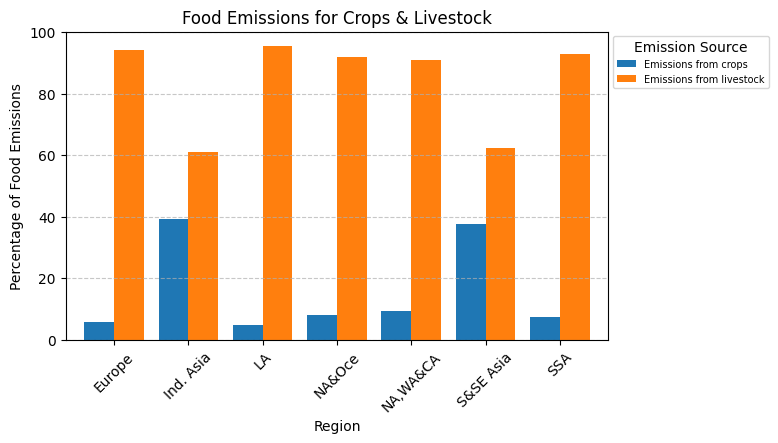

In [32]:
# Step 1: Filter dataset to keep only required sections
selected_sections = ["Emissions from crops","Emissions from livestock"]
df_filtered = fao_emission_totals[fao_emission_totals['Item'].isin(selected_sections)]
region_rename = {
    'Industrialized Asia (Ind. Asia)': 'Ind. Asia',
    'Latin America (LA)': 'LA',
    'North Africa, Western & Central Asia (NA,WA&CA)': 'NA,WA&CA',
    'North America & Oceania (NA&Oce)': 'NA&Oce',
    'South & Southeast Asia (S&SE Asia)': 'S&SE Asia',
    'Sub-Saharan Africa (SSA)': 'SSA'}
df_filtered['Region'] = df_filtered['Region'].replace(region_rename)

# Step 3: Group by region and section, summing emissions to avoid duplicates
df_grouped = df_filtered.groupby(['Region', 'Item'], as_index=False)['Emissions'].sum()

# Step 4: Compute total emissions per region
region_totals = df_grouped.groupby('Region')['Emissions'].sum()

# Step 5: Calculate percentage contribution of each section within each region
df_grouped['emissions_percentage'] = df_grouped.apply(lambda row: (row['Emissions'] / region_totals[row['Region']]) * 100, axis=1)

# Step 6: Pivot the table for plotting (grouped/clustered bar chart)
df_pivot = df_grouped.pivot(index='Region', columns='Item', values='emissions_percentage')

# Step 7: Plot clustered bar chart
ax = df_pivot.plot(kind='bar', figsize=(7, 4),width=0.8)

# Step 6: Formatting
plt.xlabel('Region')
plt.ylabel('Percentage of Food Emissions')
plt.title('Food Emissions for Crops & Livestock')
plt.legend(title="Emission Source",bbox_to_anchor=(1, 1),fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Food system emissions for each region separated by gas type**

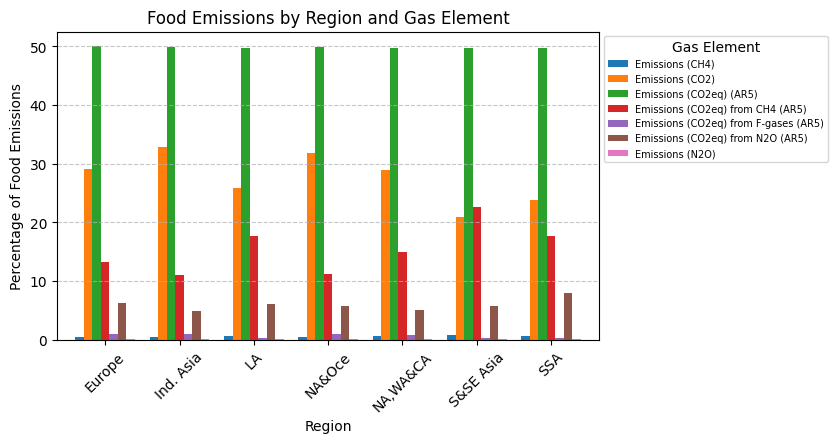

In [15]:

df_filtered = fao_emission_totals
region_rename = {
    'Industrialized Asia (Ind. Asia)': 'Ind. Asia',
    'Latin America (LA)': 'LA',
    'North Africa, Western & Central Asia (NA,WA&CA)': 'NA,WA&CA',
    'North America & Oceania (NA&Oce)': 'NA&Oce',
    'South & Southeast Asia (S&SE Asia)': 'S&SE Asia',
    'Sub-Saharan Africa (SSA)': 'SSA'}
df_filtered['Region'] = df_filtered['Region'].replace(region_rename)

# Step 3: Group by region and section, summing emissions to avoid duplicates
df_grouped = df_filtered.groupby(['Region', 'Element'], as_index=False)['Emissions'].sum()

# Step 4: Compute total emissions per region
region_totals = df_grouped.groupby('Region')['Emissions'].sum()

# Step 5: Calculate percentage contribution of each section within each region
df_grouped['emissions_percentage'] = df_grouped.apply(lambda row: (row['Emissions'] / region_totals[row['Region']]) * 100, axis=1)

# Step 6: Pivot the table for plotting (grouped/clustered bar chart)
df_pivot = df_grouped.pivot(index='Region', columns='Element', values='emissions_percentage')

# Step 7: Plot clustered bar chart
ax = df_pivot.plot(kind='bar', figsize=(7, 4),width=0.8)

# Step 6: Formatting
plt.xlabel('Region')
plt.ylabel('Percentage of Food Emissions')
plt.title('Food Emissions by Region and Gas Element')
plt.legend(title="Gas Element",bbox_to_anchor=(1, 1),fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Time series plot of food emissions share compared total emissions for each region**

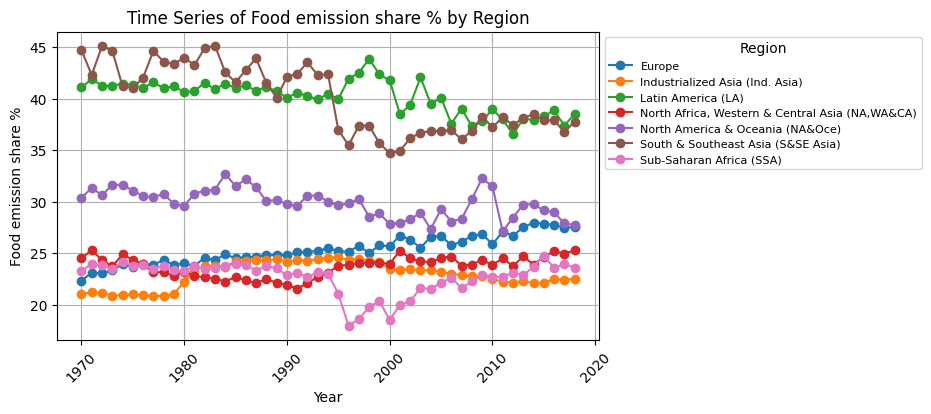

In [36]:
#Preparing the food emissions share dataset
edgar_food_share=edgar_food_share__1

# Converting column format to row format data
edgar_food_share=edgar_food_share.melt(id_vars=["Country_code_A3","Name","Substance"],var_name="year",
        value_name="share")
edgar_food_share['year'] = pd.to_numeric(edgar_food_share['year'])
edgar_food_share=edgar_food_share.rename(columns={"Country_code_A3": "Country_code",
                                              "Name": "Country"})
#Converting values to %
edgar_food_share['share'] = edgar_food_share['share'] * 100

#Joining fao_food_waste with country_income_region_mapping
edgar_food_share = pd.merge(edgar_food_share, country_income_region_mapping, on='Country_code', how='inner')
#Removing duplicating columns
edgar_food_share = edgar_food_share.drop('Country_y', axis=1)

#Plot

#Grouping Data
df_grouped = edgar_food_share.groupby(['Region', 'year'])['share'].mean().reset_index()
df_grouped.head()

# Create figure and axis
plt.figure(figsize=(7, 4))

# Plot each region separately
for Region, group in df_grouped.groupby('Region'):
    plt.plot(group['year'], group['share'], marker='o', label=Region)

# Formatting
plt.xlabel('Year')
plt.ylabel('Food emission share %')
plt.title('Time Series of Food emission share % by Region')
plt.legend(title="Region",bbox_to_anchor=(1, 1),fontsize=8)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis for better readability

# Show plot
plt.show()


**Total GHG emissions for each region showing food system emission shares with it**

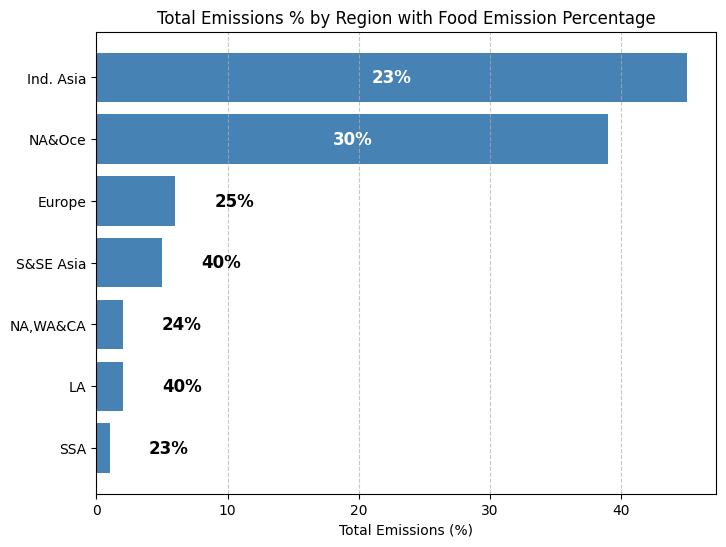

In [39]:
#Preparing the total emissions dataset
cw_pik_total_emission=cw_pik_total_emission__1
#filtering out records only for gas!='KYOTOGHG'(Duplicate data)
cw_pik_total_emission = cw_pik_total_emission.loc[cw_pik_total_emission['gas'] != 'KYOTOGHG']
#Remove unneccessary columns
cw_pik_total_emission = cw_pik_total_emission.drop(['Source','sector','gas'], axis=1)

# Converting column format to row format data
cw_pik_total_emission=cw_pik_total_emission.melt(id_vars=["country"],var_name="year",
        value_name="emissions")

#Correcting Datatype
cw_pik_total_emission['year'] = pd.to_numeric(cw_pik_total_emission['year'])

#filtering out  NA records
cw_pik_total_emission = cw_pik_total_emission.dropna(subset=["emissions"])


#Joining cw_pik_total_emission__1 with country_income_region_mapping
cw_pik_total_emission=cw_pik_total_emission.rename(columns={"country": "Country_code"})
cw_pik_total_emission = pd.merge(cw_pik_total_emission, country_income_region_mapping, on='Country_code', how='inner')

df_total = cw_pik_total_emission
df_food = edgar_food_share

region_rename = {
    'Industrialized Asia (Ind. Asia)': 'Ind. Asia',
    'Latin America (LA)': 'LA',
    'North Africa, Western & Central Asia (NA,WA&CA)': 'NA,WA&CA',
    'North America & Oceania (NA&Oce)': 'NA&Oce',
    'South & Southeast Asia (S&SE Asia)': 'S&SE Asia',
    'Sub-Saharan Africa (SSA)': 'SSA'}

df_total['Region'] = df_total['Region'].replace(region_rename)
df_food['Region'] = df_food['Region'].replace(region_rename)

# Average emissions per region
df_total_avg = df_total.groupby('Region', as_index=False)['emissions'].mean()
df_total_avg['emissions'] = ((df_total_avg['emissions'] / df_total_avg['emissions'].sum()) * 100).round()

df_food_avg = df_food.groupby('Region', as_index=False)['share'].mean()
df_food_avg['share'] = (df_food_avg['share']).round()  # Round values

# Merge both datasets on 'region' and ordering by Total Emissions
df_merged = pd.merge(df_total_avg, df_food_avg, on='Region')
df_merged = df_merged.sort_values(by='emissions', ascending=True)
# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Get number of regions and bar positions
y_pos = range(len(df_merged))

# Plot total emissions as horizontal bars
bars = ax.barh(y_pos, df_merged['emissions'], color='steelblue')

# If the bar is too small, move text outside the bar
x_pos = [bar.get_width() + 3 if bar.get_width() < 15 else bar.get_width() / 2 for bar in bars]

for bar, food_pct, x in zip(bars, df_merged['share'], x_pos):
    ax.text(x, bar.get_y() + bar.get_height() / 2,
            f'{int(food_pct)}%', ha='left' if x > bar.get_width() else 'center',
            va='center', color='white' if x == bar.get_width() / 2 else 'black',
            fontsize=12, fontweight='bold')

# Labels & Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(df_merged['Region'])
ax.set_xlabel('Total Emissions (%)')
ax.set_title('Total Emissions % by Region with Food Emission Percentage')
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
